# US Mass Shootings Analysis

Data Analyst: Raúl Eduardo Toache Thomas

The objective of this project is to create a ranking of states and cities of the United States of America according to how dangerous they are and to find if there is a relationshipt between the states with higher population density and the mass shootings per 100,000 people, and also how the gun statistics by state relate to the states with bigger mortality or bigger frequency of mass shootings per 100k habitants.
At the end of the project an excel file with the ranking from least dangerous to most dangerous of all the states, a list of the most dangerous places in each state, and the findings of the relationships between different gun statistics and mass shootings per 100,000 people will be provided.

# Phase 1: Importing Data

First we start by importing the mass shootings database and importing relevant libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
import csv

# Importing the main data about mass shootings
df_ms_events = pd.read_csv('History_of_Mass_Shootings_in_the_USA.csv', delimiter=",")
df_ms_events

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...
...,...,...,...,...,...,...,...
2707,17-06-1933,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2708,25-12-1929,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2709,14-02-1929,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2710,21-11-1927,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


In [3]:
# Importing data about population density by state
df_pop_density = pd.read_csv('united-states-by-density-[updated-march-2023].csv', delimiter=",")
df_pop_density

,state,densityMi,pop2023,TotalArea
0,District of Columbia,9243.38000,631693,68
1,New Jersey,1258.55820,9255437,8723
2,Rhode Island,1054.62573,1090483,1545
3,Massachusetts,894.13564,6974258,10554
4,Connecticut,749.49504,3629055,5543
5,Maryland,634.04862,6154710,12406
6,Delaware,529.49461,1031985,2489
7,Florida,422.59351,22661577,65758
8,New York,413.71663,19496810,54555
9,Pennsylvania,289.02749,12931957,46054


In [4]:
# Importing data about gun statistics
df_guns_by_state = pd.read_csv('Gun_Statistics_by_State.csv', delimiter=",")
df_guns_by_state = df_guns_by_state.sort_values(by='State')
df_guns_by_state

,index,State,Gun_Ownership_Rate,Registered_Gun_Rate,Gun_Death_Rate,Red_Blue_State
9,10,Alabama,52.8,38.7,23.6,Republican
4,5,Alaska,57.2,38.5,23.5,Republican
34,35,Arizona,36.4,35.6,16.7,Democrat
13,14,Arkansas,51.8,44.3,22.6,Republican
44,45,California,16.3,10.4,8.5,Democrat
31,32,Colorado,37.9,25.7,15.4,Democrat
42,43,Connecticut,18.8,20.8,6.0,Democrat
29,30,Delaware,38.7,6.1,14.4,Democrat
50,51,District of Columbia,NaN,NaN,NaN,Democrat
40,41,Florida,28.8,23.8,13.7,Republican


# Phase 2: Exploratory Data Analysis & Cleaning

In [5]:
# Here data is grouped by city by state so that each city has its total from mass shootings count, deaths count, injured count, and total victimas count

grouped_df = df_ms_events.groupby(['City', 'State']).agg({'City': 'count', 'Dead': 'sum', 'Injured': 'sum'}).rename(columns={'City': 'Frequency', 'Dead': 'Total_Dead', 'Injured': 'Total_Injured'}).reset_index()

cities_df = pd.DataFrame({
    'City': grouped_df['City'],
    'State': grouped_df['State'],
    'Frequency': grouped_df['Frequency'],
    'Total_Dead': grouped_df['Total_Dead'],
    'Total_Injured': grouped_df['Total_Injured'],
    'Total': grouped_df['Total_Dead'] + grouped_df['Total_Injured']
})

cities_df

,City,State,Frequency,Total_Dead,Total_Injured,Total
0,Abbeville,South Carolina,1,3,1,4
1,Aberdeen,Maryland,1,4,3,7
2,Abington,Massachusetts,1,5,0,5
3,Adelphi,Maryland,1,1,4,5
4,Aguanga,California,1,7,0,7
...,...,...,...,...,...,...
980,Yountville,California,1,5,0,5
981,Yuba City,California,1,2,3,5
982,Yucaipa,California,1,0,5,5
983,Yuma,Arizona,1,0,4,4


In [6]:
# Here data is grouped by state. Similar to the previous grouping by cities.

state_grouped_df = df_ms_events.groupby('State').agg({'State': 'count', 'Dead': 'sum', 'Injured': 'sum', 'Total': 'sum'}).rename(columns={'State': 'Frequency', 'Dead': 'Total_Dead', 'Injured': 'Total_Injured', 'Total': 'Total'}).reset_index()

states_df = pd.DataFrame({'State': state_grouped_df['State'], 'Frequency': state_grouped_df['Frequency'], 'Total_Dead': state_grouped_df['Total_Dead'], 'Total_Injured': state_grouped_df['Total_Injured'], 'Total': state_grouped_df['Total']})

states_df

,State,Frequency,Total_Dead,Total_Injured,Total
0,Alabama,71,89,267,356
1,Alaska,7,16,14,30
2,Arizona,31,55,147,201
3,Arkansas,35,39,175,214
4,California,223,474,988,1462
5,Colorado,52,111,282,393
6,Connecticut,20,47,68,115
7,Delaware,13,13,45,58
8,District of Columbia,39,23,182,205
9,Florida,137,229,608,837


In [7]:
cities_df.describe()

,Frequency,Total_Dead,Total_Injured,Total
count,985.000000,985.000000,985.000000,985.000000
mean,2.753299,3.955330,12.117766,16.073096
std,8.472280,7.642151,39.520504,45.826741
min,1.000000,0.000000,0.000000,3.000000
25%,1.000000,1.000000,3.000000,4.000000
50%,1.000000,2.000000,4.000000,5.000000
75%,2.000000,4.000000,8.000000,11.000000
max,198.000000,118.000000,881.000000,999.000000


In [8]:
cities_df.head(10)

,City,State,Frequency,Total_Dead,Total_Injured,Total
0,Abbeville,South Carolina,1,3,1,4
1,Aberdeen,Maryland,1,4,3,7
2,Abington,Massachusetts,1,5,0,5
3,Adelphi,Maryland,1,1,4,5
4,Aguanga,California,1,7,0,7
5,Aiken,South Carolina,3,9,18,27
6,Akron,Ohio,3,1,12,13
7,Alachua,Florida,1,0,5,5
8,Albany,Georgia,3,2,10,12
9,Albany,New York,7,4,34,38


In [16]:
# new_df.to_csv('revisionDataframe.csv')

# Phase 3: ETL & Data Cleaning

In [9]:
# Here a new data frame is created containing only the top 5 cities with more mass shootings of each state
top_cities__freq_df = cities_df.groupby('State').apply(lambda x: x.nlargest(5, 'Frequency')).reset_index(drop=True)
top_cities__freq_df

,City,State,Frequency,Total_Dead,Total_Injured,Total
0,Birmingham,Alabama,11,11,41,52
1,Montgomery,Alabama,11,9,43,52
2,Mobile,Alabama,7,4,33,37
3,Troy,Alabama,3,3,12,15
4,Tuscaloosa,Alabama,3,0,14,14
...,...,...,...,...,...,...
214,Kenosha,Wisconsin,5,9,14,23
215,Racine,Wisconsin,3,1,16,17
216,Brookfield,Wisconsin,2,12,8,20
217,Madison,Wisconsin,2,0,8,8


In [10]:
#top_cities__freq_df.to_csv('Tabla_5_peores_ciudades_x_estado.csv')

In [10]:
# The data of data frame containing statistics by state and the data from the population data frame get merged together.

statistics_by_state_df = df_pop_density.merge(states_df, left_on='state', right_on='State', how='left')

# New columns get calculated according to population density by each 100k habitants
statistics_by_state_df['Freq100k'] = (statistics_by_state_df['Frequency'] / statistics_by_state_df['pop2023']) * 100000
statistics_by_state_df['Dead100k'] = (statistics_by_state_df['Total_Dead'] / statistics_by_state_df['pop2023']) * 100000
statistics_by_state_df['Injured100k'] = (statistics_by_state_df['Total_Injured'] / statistics_by_state_df['pop2023']) * 100000
statistics_by_state_df['Total100k'] = (statistics_by_state_df['Total'] / statistics_by_state_df['pop2023']) * 100000

statistics_by_state_df.drop(columns=['State'], inplace=True)

missing_states_df = states_df[~states_df['State'].isin(statistics_by_state_df['state'])]

missing_states_df.rename(columns={'State': 'state'}, inplace=True)

missing_states_df['Freq100k'] = None
missing_states_df['Dead100k'] = None
missing_states_df['Injured100k'] = None
missing_states_df['Total100k'] = None

statistics_by_state_df = pd.concat([statistics_by_state_df, missing_states_df], ignore_index=True)

statistics_by_state_df = statistics_by_state_df.sort_values(by='state')
statistics_by_state_df

C:\Users\Raúl Eduardo\AppData\Local\Temp\ipykernel_8304\3742545116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_states_df.rename(columns={'State': 'state'}, inplace=True)


,state,densityMi,pop2023,TotalArea,Frequency,Total_Dead,Total_Injured,Total,Freq100k,Dead100k,Injured100k,Total100k
27,Alabama,100.67620,5098746.0,52420.0,71.0,89.0,267.0,356.0,1.392499,1.745527,5.236582,6.982109
50,Alaska,1.28449,732984.0,665384.0,7.0,16.0,14.0,30.0,0.955000,2.182858,1.910001,4.092859
32,Arizona,65.61541,7453517.0,113990.0,31.0,55.0,147.0,201.0,0.415911,0.737907,1.972223,2.696714
35,Arkansas,58.86715,3063152.0,53179.0,35.0,39.0,175.0,214.0,1.142614,1.273198,5.713069,6.986268
11,California,249.81347,38915693.0,163696.0,223.0,474.0,988.0,1462.0,0.573034,1.218018,2.538822,3.756839
37,Colorado,56.62333,5868555.0,104094.0,52.0,111.0,282.0,393.0,0.886078,1.891437,4.805271,6.696708
4,Connecticut,749.49504,3629055.0,5543.0,20.0,47.0,68.0,115.0,0.551108,1.295103,1.873766,3.168869
6,Delaware,529.49461,1031985.0,2489.0,13.0,13.0,45.0,58.0,1.259708,1.259708,4.360528,5.620237
0,District of Columbia,9243.38000,631693.0,68.0,39.0,23.0,182.0,205.0,6.173885,3.641009,28.811464,32.452473
7,Florida,422.59351,22661577.0,65758.0,137.0,229.0,608.0,837.0,0.604548,1.010521,2.682955,3.693476


In [11]:
# New data frame is created to store all previous data along the gun statistics by state. Data is cleaned to prevent errors.

complete_states_data_df = statistics_by_state_df.merge(df_guns_by_state, left_on='state', right_on='State')

complete_states_data_df['Frequency'].fillna(0, inplace=True)
complete_states_data_df['Total_Dead'].fillna(0, inplace=True)
complete_states_data_df['Total_Injured'].fillna(0, inplace=True)
complete_states_data_df['Total'].fillna(0, inplace=True)
complete_states_data_df['Freq100k'].fillna(0, inplace=True)
complete_states_data_df['Dead100k'].fillna(0, inplace=True)
complete_states_data_df['Injured100k'].fillna(0, inplace=True)
complete_states_data_df['Total100k'].fillna(0, inplace=True)
complete_states_data_df['Gun_Ownership_Rate'].fillna(0, inplace=True)
complete_states_data_df['Registered_Gun_Rate'].fillna(0, inplace=True)
complete_states_data_df['Gun_Death_Rate'].fillna(0, inplace=True)
complete_states_data_df['Red_Blue_State'].fillna("N/A", inplace=True)

complete_states_data_df.drop(columns=['State'], inplace=True)
complete_states_data_df.drop(columns=['index'], inplace=True)
complete_states_data_df

,state,densityMi,pop2023,TotalArea,Frequency,Total_Dead,Total_Injured,Total,Freq100k,Dead100k,Injured100k,Total100k,Gun_Ownership_Rate,Registered_Gun_Rate,Gun_Death_Rate,Red_Blue_State
0,Alabama,100.67620,5098746.0,52420.0,71.0,89.0,267.0,356.0,1.392499,1.745527,5.236582,6.982109,52.8,38.7,23.6,Republican
1,Alaska,1.28449,732984.0,665384.0,7.0,16.0,14.0,30.0,0.955000,2.182858,1.910001,4.092859,57.2,38.5,23.5,Republican
2,Arizona,65.61541,7453517.0,113990.0,31.0,55.0,147.0,201.0,0.415911,0.737907,1.972223,2.696714,36.4,35.6,16.7,Democrat
3,Arkansas,58.86715,3063152.0,53179.0,35.0,39.0,175.0,214.0,1.142614,1.273198,5.713069,6.986268,51.8,44.3,22.6,Republican
4,California,249.81347,38915693.0,163696.0,223.0,474.0,988.0,1462.0,0.573034,1.218018,2.538822,3.756839,16.3,10.4,8.5,Democrat
5,Colorado,56.62333,5868555.0,104094.0,52.0,111.0,282.0,393.0,0.886078,1.891437,4.805271,6.696708,37.9,25.7,15.4,Democrat
6,Connecticut,749.49504,3629055.0,5543.0,20.0,47.0,68.0,115.0,0.551108,1.295103,1.873766,3.168869,18.8,20.8,6.0,Democrat
7,Delaware,529.49461,1031985.0,2489.0,13.0,13.0,45.0,58.0,1.259708,1.259708,4.360528,5.620237,38.7,6.1,14.4,Democrat
8,District of Columbia,9243.38000,631693.0,68.0,39.0,23.0,182.0,205.0,6.173885,3.641009,28.811464,32.452473,0.0,0.0,0.0,Democrat
9,Florida,422.59351,22661577.0,65758.0,137.0,229.0,608.0,837.0,0.604548,1.010521,2.682955,3.693476,28.8,23.8,13.7,Republican


In [12]:
# Export data to excel file to generate rankings and copy those to the final document
complete_states_data_df.to_excel('ranking.xlsx', index=False)

In [12]:
condition = complete_states_data_df['Gun_Ownership_Rate'] == 0.0
complete_states_data_df = complete_states_data_df[~condition]
complete_states_data_df.reset_index(drop=True, inplace=True)
#complete_states_data_df['densityMi'] = complete_states_data_df['densityMi'].apply(lambda x: round(x, 1))
complete_states_data_df

,state,densityMi,pop2023,TotalArea,Frequency,Total_Dead,Total_Injured,Total,Freq100k,Dead100k,Injured100k,Total100k,Gun_Ownership_Rate,Registered_Gun_Rate,Gun_Death_Rate,Red_Blue_State
0,Alabama,100.67620,5098746.0,52420.0,71.0,89.0,267.0,356.0,1.392499,1.745527,5.236582,6.982109,52.8,38.7,23.6,Republican
1,Alaska,1.28449,732984.0,665384.0,7.0,16.0,14.0,30.0,0.955000,2.182858,1.910001,4.092859,57.2,38.5,23.5,Republican
2,Arizona,65.61541,7453517.0,113990.0,31.0,55.0,147.0,201.0,0.415911,0.737907,1.972223,2.696714,36.4,35.6,16.7,Democrat
3,Arkansas,58.86715,3063152.0,53179.0,35.0,39.0,175.0,214.0,1.142614,1.273198,5.713069,6.986268,51.8,44.3,22.6,Republican
4,California,249.81347,38915693.0,163696.0,223.0,474.0,988.0,1462.0,0.573034,1.218018,2.538822,3.756839,16.3,10.4,8.5,Democrat
5,Colorado,56.62333,5868555.0,104094.0,52.0,111.0,282.0,393.0,0.886078,1.891437,4.805271,6.696708,37.9,25.7,15.4,Democrat
6,Connecticut,749.49504,3629055.0,5543.0,20.0,47.0,68.0,115.0,0.551108,1.295103,1.873766,3.168869,18.8,20.8,6.0,Democrat
7,Delaware,529.49461,1031985.0,2489.0,13.0,13.0,45.0,58.0,1.259708,1.259708,4.360528,5.620237,38.7,6.1,14.4,Democrat
8,Florida,422.59351,22661577.0,65758.0,137.0,229.0,608.0,837.0,0.604548,1.010521,2.682955,3.693476,28.8,23.8,13.7,Republican
9,Georgia,191.91701,11037723.0,59425.0,92.0,89.0,365.0,454.0,0.833505,0.806326,3.306841,4.113167,37.7,28.2,17.7,Democrat


# Phase 4: Linear-Regression Model

In [13]:
# This is the main code for the model. Note that it was arranged to work with three different variables for three different plots.

def gradient_descent(m_now, b_now, data, L, variable):
    m_gradient = 0
    b_gradient = 0
    n = len(data)
    
    for i in range(n):
        if variable == 1:
            x = data.iloc[i].Gun_Ownership_Rate
        elif variable == 2:
            x = data.iloc[i].Registered_Gun_Rate
        elif variable == 3:
            x = data.iloc[i].Gun_Death_Rate
        y = data.iloc[i].Freq100k
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

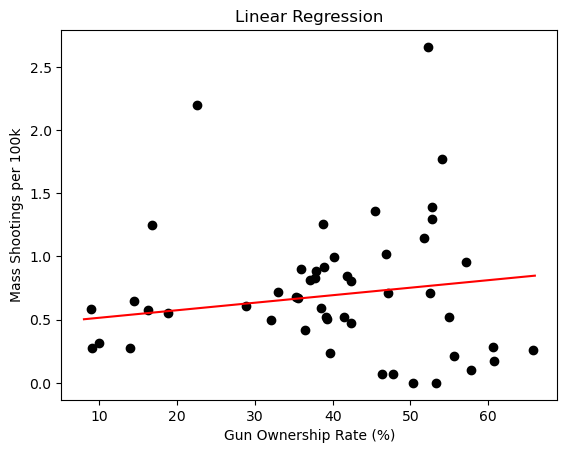

m = 0.005942524272973258  b = 0.45603935716016186


In [15]:
## Linear Regression: This model will be implemented to determine the relationship between Gun Ownership Rate and the mass shootings per 100k people (Freq100k).
m = 0
b = 0.45
L = 0.0001
variable = 1
epochs = 1000
for i in range(epochs):
    m, b = gradient_descent(m, b, complete_states_data_df, L, variable)

plt.scatter(complete_states_data_df.Gun_Ownership_Rate, complete_states_data_df.Freq100k, color="black")
plt.plot(list(range(8, 67)), [m * x + b for x in range(8, 67)], color="red")
plt.xlabel("Gun Ownership Rate (%)")
plt.ylabel("Mass Shootings per 100k")
plt.title("Linear Regression")
plt.show()
print("m =", m, " b =", b)

In this first model we can observe that there is a small relationship between the two variables so that as Gun Ownership Rate increases, also the Frequency of Mass Shootings per 100k increases a little.

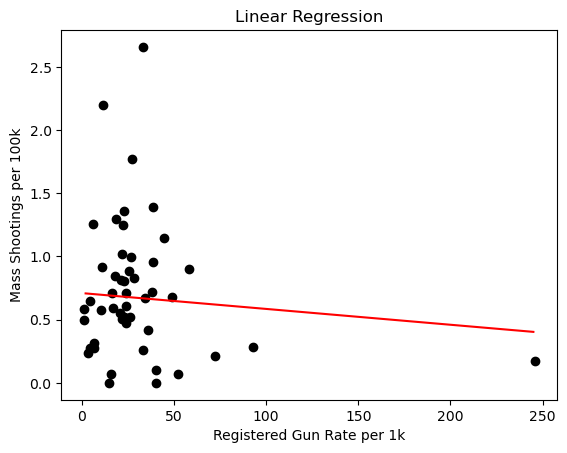

m = -0.0012516524792067637  b = 0.7103995010992882


In [16]:
## Linear Regression: This model will be implemented to determine the relationship between Registered Gun Rate and the mass shootings per 100k people (Freq100k).
m = 0
b = 0.7
L = 0.0001
variable = 2
epochs = 1000
for i in range(epochs):
    m, b = gradient_descent(m, b, complete_states_data_df, L, variable)

plt.scatter(complete_states_data_df.Registered_Gun_Rate, complete_states_data_df.Freq100k, color="black")
plt.plot(list(range(2, 246)), [m * x + b for x in range(2, 246)], color="red")
plt.xlabel("Registered Gun Rate per 1k")
plt.ylabel("Mass Shootings per 100k")
plt.title("Linear Regression")
plt.show()
print("m =", m, " b =", b)

In this second model we can observe that there is some relation between the Registered Gun Rate and the amount of mass shootings per 100k so that with bigger rates of registered guns could mean lower amounts of mass shootings. It is also possible to see that there are some states where there is little amount of registered guns with little risk of mass shootings, but also a lot more states with higher risk of mass shootings. 

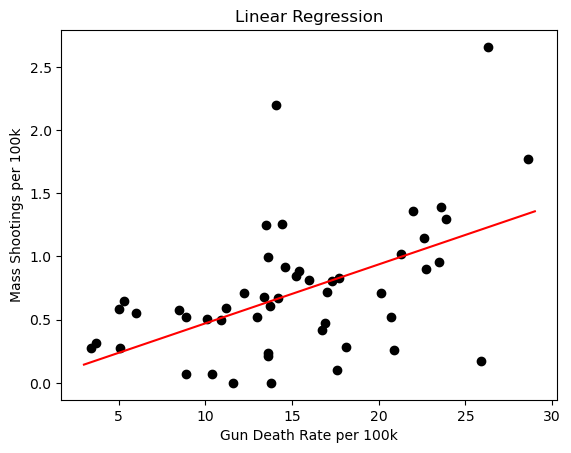

m = 0.04663546612845674  b = 0.004869867484654802


In [17]:
## Linear Regression: This model will be implemented to determine the relationship between Gun Death Rate and the mass shootings per 100k people (Freq100k).
m = 0
b = 0
L = 0.0001
variable = 3
epochs = 1000
for i in range(epochs):
    m, b = gradient_descent(m, b, complete_states_data_df, L, variable)

plt.scatter(complete_states_data_df.Gun_Death_Rate, complete_states_data_df.Freq100k, color="black")
plt.plot(list(range(3, 30)), [m * x + b for x in range(3, 30)], color="red")
plt.xlabel("Gun Death Rate per 100k")
plt.ylabel("Mass Shootings per 100k")
plt.title("Linear Regression")
plt.show()
print("m =", m, " b =", b)

For this last linear-regression model you can see that there is big relationship between the Gun Death Rate per 100k and the frequency of mass shootings per 100k. However, we cal learn from this plot that states with higher Gun Death rate and lower Mass Shootings Rate are subject to more homicides targeted to a specific person, or armed roberies to up to two people at the same time. Consider that for an event to be considered a mass shooting it has to have at least three total victims (including injured and killed victims)